<a href="https://colab.research.google.com/github/redavis22/SSE/blob/master/FINAL_Roger_Davis_of_NBA_Linear_regresion_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow 
import pandas as pd

In [ ]:
import keras
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
import numpy as np
from matplotlib import style

In [ ]:
!wget 'https://sse644-project2.s3.amazonaws.com/nba_data.csv'

--2021-10-26 00:38:34--  https://sse644-project2.s3.amazonaws.com/nba_data.csv
Resolving sse644-project2.s3.amazonaws.com (sse644-project2.s3.amazonaws.com)... 54.231.129.33
Connecting to sse644-project2.s3.amazonaws.com (sse644-project2.s3.amazonaws.com)|54.231.129.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9087139 (8.7M) [text/csv]
Saving to: ‘nba_data.csv’

nba_data.csv        100%[===================>]   8.67M  26.1MB/s    in 0.3s    

2021-10-26 00:38:35 (26.1 MB/s) - ‘nba_data.csv’ saved [9087139/9087139]



In [ ]:
#data = pd.read_csv("student-mat.csv", sep=";") #reads the data set     #sep is used to filter for semicolons instead of commas
data = pd.read_csv("nba_data.csv")

In [ ]:
data


,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,.,OWS,DWS,WS,WS/48,..1,OBPM,DBPM,BPM,VORP,OWS/48,DWS/48,Shot%,Player ID,Team Mar,Team MP,Team Gm,Year 3PAr,Team TS%,Tm USG,Tm TS W/O Plyr,Reb/Vers,...,DStdErr,Dcontrib,DVORP,Sum SPM,%Min.1,MPG.1,ReMPG,BPM.2,Contrib.2,VORP.2,VORP-Gm,O-BPM,Ocontrib.1,OVORP.1,OVORP-Gm,D-BPM,Dcontrib.1,DVORP.1,DVORP-Gm,Production,Prod-Gm,Exp BPM,TrueTalentBPM,Exp%Min,TrueTalentVORP,TrueSalary,TrueTimeVORP,Adjusted Production,WORP,O-WORP,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,0.481,NaN,0.340,8.0,25.8,17.0,6.8,0.9,1.1,13.5,23.3,NaN,1.5,5.0,6.5,0.086,NaN,-1.4,0.2,-1.2,0.7,0.020,0.066,20.2,robintr01,-1.61,19780,82,0.000,0.505,331339,0.512,-1.73,...,1.5,0.1,0.4,-1.6,0.9,44.4,42.3,-1.3,-1.2,0.6,0.6,-1.5,-1.4,0.2,0.2,0.1,0.1,0.4,0.4,"$3,900,000","$3,900,000",3.2,0.7,0.60,1.6,"$8,800,000",0.4,"$2,900,000",1.6,0.6,1.1,1.1,3.6,4.0,26.33,3.0,79.0,225.0,4.0,26.0
1,1978,BUF,Randy Smith,29,82,3314,19.1,0.521,NaN,0.326,3.6,6.4,5.0,22.2,2.4,0.2,12.8,26.8,NaN,6.1,1.7,7.9,0.114,NaN,2.8,-1.2,1.6,3.0,0.089,0.025,23.4,smithra01,-3.25,19805,82,0.000,0.518,332955,0.517,0.52,...,1.5,-1.1,-0.8,4.4,0.8,40.4,38.5,1.8,1.5,3.1,3.1,3.1,2.6,4.0,4.0,-1.3,-1.1,-0.8,-0.8,"$16,200,000","$16,200,000",2.1,1.9,0.73,2.8,"$14,800,000",2.7,"$14,200,000",8.5,10.8,-2.3,7.4,1.0,2.0,29.14,6.0,75.0,180.0,1.0,29.0
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,0.489,NaN,0.365,10.2,22.7,16.4,6.5,1.3,2.4,12.3,21.6,NaN,3.5,4.8,8.3,0.123,NaN,0.1,1.2,1.3,2.7,0.052,0.071,18.9,hayesel01,0.70,19830,82,0.000,0.506,336086,0.510,-1.31,...,1.5,1.0,1.3,-1.2,0.8,40.1,38.2,1.3,1.1,2.7,2.8,0.1,0.1,1.5,1.5,1.3,1.0,1.3,1.3,"$14,200,000","$14,400,000",2.6,1.9,0.73,2.8,"$14,700,000",2.4,"$12,700,000",7.4,3.9,3.4,6.5,4.2,4.0,32.21,9.0,81.0,235.0,4.0,32.0
3,1978,BOS,Dave Cowens,29,77,3215,18.6,0.533,NaN,0.233,8.0,25.6,17.0,15.7,1.4,1.1,13.9,18.8,NaN,6.1,4.8,10.8,0.162,NaN,1.8,2.1,4.0,4.8,0.091,0.071,16.2,cowenda01,-1.68,19830,82,0.000,0.505,332440,0.500,2.36,...,1.5,2.0,2.3,-0.6,0.8,41.8,39.7,4.4,3.6,5.2,5.5,1.9,1.5,2.9,3.1,2.5,2.0,2.3,2.4,"$26,100,000","$27,700,000",2.6,3.6,0.73,4.0,"$20,600,000",4.6,"$23,400,000",14.0,7.9,6.1,12.5,3.9,5.0,29.27,7.0,81.0,230.0,4.0,29.0
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,0.567,NaN,0.412,7.8,24.7,16.4,13.4,1.4,2.0,15.8,26.1,NaN,6.9,4.0,10.9,0.165,NaN,2.4,0.8,3.1,4.1,0.104,0.061,22.0,mcadobo01,-0.47,20005,82,0.000,0.528,333391,0.518,1.37,...,1.5,0.7,1.0,1.6,0.8,40.3,38.3,3.4,2.7,4.3,4.5,2.5,2.0,3.3,3.5,0.9,0.7,1.0,1.0,"$21,800,000","$22,600,000",2.5,3.0,0.73,3.6,"$18,500,000",3.9,"$19,900,000",11.6,9.0,2.6,10.6,3.6,5.0,26.36,5.0,81.0,210.0,4.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17724,2016,BRK,0,0,0,0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,-17.28,1681,7,0.275,0.490,28651,0.000,0.00,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
17725,2016,BRK,0,0,0,0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,-17.28,1681,7,0.275,0.490,28651,0.000,0.00,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
17726,2016,BRK,0,0,0,0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,-17.28,1681,7,0.275,0.490,28651,0.000,0.00,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Na

In [ ]:

#print(data.head())#grabs the first 5 elements of the dataset
data = data [["DRB%","STL%","BLK%","Defense"]]   
print(data.head())# grabs the modified data

   DRB%  STL%  BLK%  Defense
0  25.8   0.9   1.1    -1.12
1   6.4   2.4   0.2     0.29
2  22.7   1.3   2.4     0.08
3  25.6   1.4   1.1    -0.49
4  24.7   1.4   2.0    -0.01


In [ ]:
predict = "Defense" 
X=np.array(data.drop([predict],1))
Y=np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.1)
'''
best=0
for _ in range(30):#trying to find the best accuracy for the pickle model
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.1) # taking all of our attributes/label and splting them up into four diffect arrays. Test is used to test the accuracy
    linear = linear_model.LinearRegression() #what approach we are working with
    linear.fit(x_train, y_train) #finds the best fit line
    acc=linear.score(x_test, y_test)
    print(acc)
    if acc>best:
        best=acc
        with open ("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)
            '''


'\nbest=0\nfor _ in range(30):#trying to find the best accuracy for the pickle model\n    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.1) # taking all of our attributes/label and splting them up into four diffect arrays. Test is used to test the accuracy\n    linear = linear_model.LinearRegression() #what approach we are working with\n    linear.fit(x_train, y_train) #finds the best fit line\n    acc=linear.score(x_test, y_test)\n    print(acc)\n    if acc>best:\n        best=acc\n        with open ("studentmodel.pickle", "wb") as f:\n            pickle.dump(linear, f)\n            '

In [15]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)


0.9019952594404831


In [18]:
print('Co: \n', linear.coef_)#m in y=mx+b
print('Intercept: \n',  linear.intercept_)#y intercept b

Co: 
 [-0.02219926  1.13202344  0.52541159]
Intercept: 
 -2.325035836449109


In [17]:
predictions = linear.predict(x_test)
for x in range (len(predictions)):
        print(predictions[x], x_test[x],y_test[x])

0.8957508105186793 [15.9  2.6  1.2] 1.04
0.6333492763654855 [17.5  1.1  4. ] 0.68
0.001186455509791795 [11.4  2.   0.6] -0.12
-1.2041171543080655 [12.7  1.1  0.3] -1.33
3.432574076185558 [21.6  2.4  6.7] 3.57
-0.850258710981693 [20.6  0.5  2.6] -0.85
-0.5700474088693224 [10.   1.7  0.1] -0.6
-2.8600379613621048 [24.1  0.   0. ] -2.77
-1.4815713947519495 [22.1  0.9  0.6] -1.41
1.2124040394795772 [5.1 2.9 0.7] 1.14
-1.0044019371300843 [22.1  1.6  0. ] -0.93
-1.2573588859709846 [12.   0.9  0.6] -1.29
-0.47386741003138066 [8.4 1.8 0. ] -0.85
-3.1419685417104466 [36.8  0.   0. ] -2.98
-0.23770152391470623 [24.7  1.4  2. ] -0.01
0.47115899980414166 [12.8  1.7  2.2] 0.21
-0.04979011998801752 [14.6  1.6  1.5] -0.16
0.26901005831153624 [9.9 2.3 0.4] 0.27
-1.6503032419753838 [15.5  0.9  0. ] -1.81
-0.9983975023069662 [25.1  1.2  1. ] -0.91
-0.800123530479155 [16.9  1.4  0.6] -0.75
-2.325035836449109 [0. 0. 0.] 0.0
-0.0047362607323022665 [9.3 2.  0.5] -0.2
2.5181069763045985 [31.1  1.5  7.3] 2.98

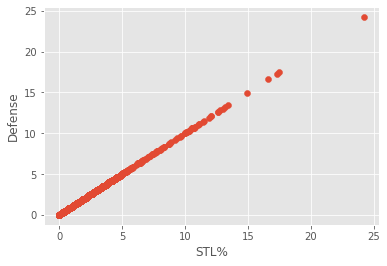

In [20]:
p='STL%'
style.use("ggplot")
pyplot.scatter(data[p],data["STL%"])
pyplot.xlabel(p)
pyplot.ylabel("Defense")
pyplot.show()

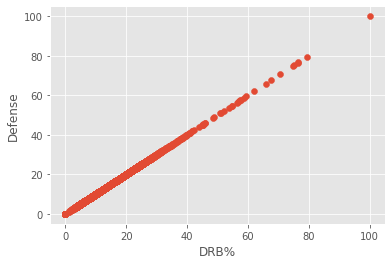

In [21]:
p='DRB%'
style.use("ggplot")
pyplot.scatter(data[p],data["DRB%"])
pyplot.xlabel(p)
pyplot.ylabel("Defense")
pyplot.show()

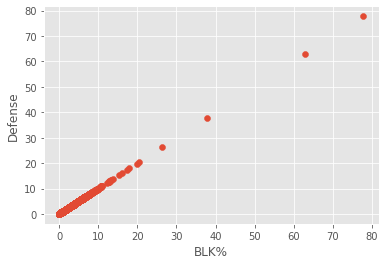

In [22]:
p='BLK%'
style.use("ggplot")
pyplot.scatter(data[p],data["BLK%"])
pyplot.xlabel(p)
pyplot.ylabel("Defense")
pyplot.show()